In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

Data Collection and Processing

In [ ]:
# loading the data from csv file to pandas dataframe
predict_cars = pd.read_csv('/content/train.csv')

In [ ]:
# inspecting the first 5 rows of the dataframe
predict_cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
# checking the number of rows and columns
predict_cars.shape

(19237, 18)

In [ ]:
# getting some information about the dataset
predict_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
# checking the number of missing values
predict_cars.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
predict_cars.rename(columns={'Fuel type':'Fuel_Type'},inplace = True)

In [ ]:
# checking the distribution of categorical data
print(predict_cars.Fuel_Type.value_counts())


Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel_Type, dtype: int64


In [ ]:
predict_cars.rename(columns={'Gear box type':'Gear_Box'},inplace = True)

In [ ]:
print(predict_cars.Gear_Box.value_counts())

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear_Box, dtype: int64


In [ ]:
predict_cars.rename(columns={'Manufacturer':'Brand'},inplace = True)

In [ ]:
print(predict_cars.Brand.value_counts())

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
TESLA               1
PONTIAC             1
SATURN              1
ASTON MARTIN        1
GREATWALL           1
Name: Brand, Length: 65, dtype: int64


In [ ]:
predict_cars.rename(columns={'Mileage':'Mileage'},inplace = True)

In [ ]:
print(predict_cars.Mileage.value_counts())

0 km         721
200000 km    183
150000 km    161
160000 km    120
100000 km    119
            ... 
63083 km       1
28750 km       1
25077 km       1
77452 km       1
186923 km      1
Name: Mileage, Length: 7687, dtype: int64


In [ ]:
print(predict_cars.Category.value_counts())

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64


In [ ]:
predict_cars.rename(columns={'Leather interior':'leather_interior'},inplace=True)

In [ ]:
print(predict_cars.leather_interior.value_counts())

Yes    13954
No      5283
Name: leather_interior, dtype: int64


Encoding the Categorical Data

In [ ]:
# encoding "Fuel_Type" Column
predict_cars.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,'Hybrid':3,'LPG':4,'Plug-in Hybrid':5,'Hydrogen':6}},inplace=True)

# encoding "Seller_Type" Column
predict_cars.replace({'Gear_Box':{'Automatic':0,'Tiptronic':1,'Manual':2,'Variator':3}},inplace=True)

# encoding "Transmission" Column
predict_cars.replace({'Category':{'Sedan':0,'Jeep':1,'Hatchback':2,'Minivan':3,'Coupe':4,'Universal':5,'Microbus':6,'Goods wagon':7,'Pickup':8,'Cabriolet':9,'Limousine':10}},inplace=True)
predict_cars.replace({'leather_interior':{'Yes':0,'No':1}},inplace=True)

In [ ]:
predict_cars.head()

,ID,Price,Levy,Brand,Model,Prod. year,Category,leather_interior,Fuel_Type,Engine volume,Mileage,Cylinders,Gear_Box,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,1,0,3,3.5,186005 km,6.0,0,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,1,1,0,3,192000 km,6.0,1,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,2,1,0,1.3,200000 km,4.0,3,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,1,0,3,2.5,168966 km,4.0,0,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,2,0,0,1.3,91901 km,4.0,0,Front,04-May,Left wheel,Silver,4


Splitting the data and Target

In [ ]:
x = predict_cars.drop(['ID','Mileage','Color','Brand','Levy','Model','Engine volume','Cylinders','Drive wheels','Doors','Wheel','Airbags','Price'],axis=1)
y = predict_cars['Price']

In [ ]:
print(x)

       Prod. year  Category  leather_interior  Fuel_Type  Gear_Box
0            2010         1                 0          3         0
1            2011         1                 1          0         1
2            2006         2                 1          0         3
3            2011         1                 0          3         0
4            2014         2                 0          0         0
...           ...       ...               ...        ...       ...
19232        1999         4                 0          2         2
19233        2011         0                 0          0         1
19234        2010         1                 0          1         0
19235        2007         1                 0          1         0
19236        2012         0                 0          3         0

[19237 rows x 5 columns]


In [ ]:
print(y)

0        13328
1        16621
2         8467
3         3607
4        11726
         ...  
19232     8467
19233    15681
19234    26108
19235     5331
19236      470
Name: Price, Length: 19237, dtype: int64


Splitting Training and Test data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=2)

Model Training

1. Linear Regression

In [ ]:
# loading the linear regression model
linearTEST = LinearRegression()

In [ ]:
linearTEST.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on Training data
predict = linearTEST.predict(x_train)

In [ ]:
# R squared noise
noise = metrics.r2_score(y_train,predict)
print("R squared noise : ", noise)

R squared noise :  0.124185963225803


Visualize the actual prices and Predicted prices

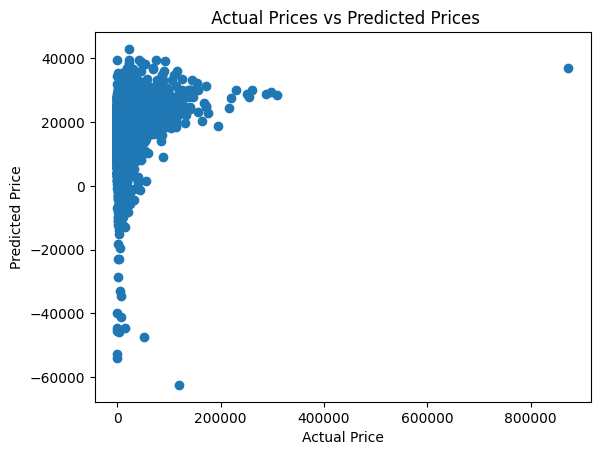

In [ ]:
plt.scatter(y_train,predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
TEST_predict = linearTEST.predict(x_test)

In [ ]:
# R squared noise
noise = metrics.r2_score(y_test, TEST_predict)
print("R squared noise : ", noise)

R squared noise :  -0.00018958375393474114


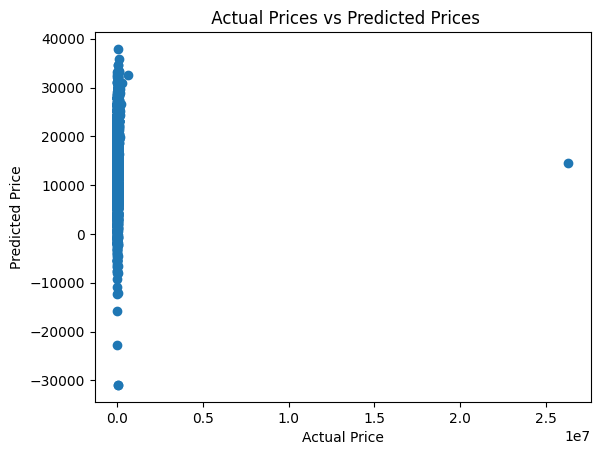

In [ ]:
plt.scatter(y_test,TEST_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

2. Lasso Regression

In [ ]:
# loading the linear regression model
lass_reg_model = Lasso()

In [ ]:
lass_reg_model.fit(x_train,y_train)

Lasso()

Model Evaluation

In [ ]:
# prediction on Training data
training_data_predict = lass_reg_model.predict(x_train)

In [ ]:
# R squared noise
noise_score = metrics.r2_score(y_train, training_data_predict)
print("R squared noise : ", noise_score)

R squared noise :  0.12418593201428774


Visualize the actual prices and Predicted prices

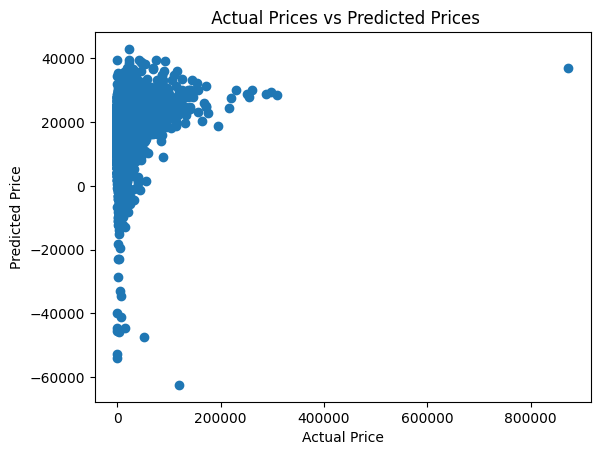

In [ ]:
plt.scatter(y_train, training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
# prediction on Training data
test_data_predict = lass_reg_model.predict(x_test)

In [ ]:
# R squared noise
noise_score = metrics.r2_score(y_test, test_data_predict)
print("R squared noise : ", noise_score)

R squared noise :  -0.00018974560537610152


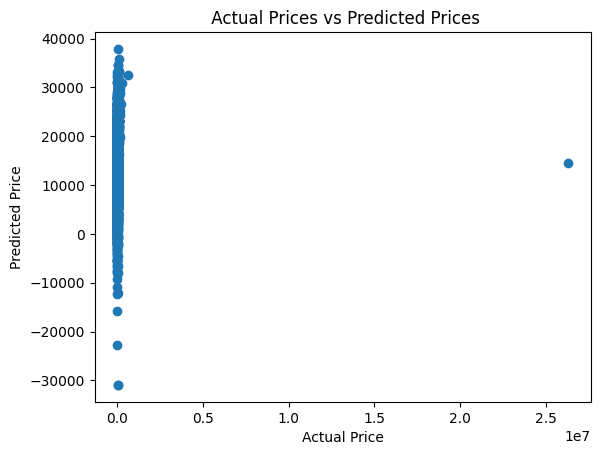

In [ ]:
plt.scatter(y_test, test_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
decision=DecisionTreeRegressor()

In [ ]:
decision.fit(x_train,y_train)

DecisionTreeRegressor()

In [ ]:
training_data_predict = decision.predict(x_train)

In [ ]:
error=metrics.r2_score(y_train,training_data_predict)
print("error score is :",error)

error score is : 0.5594266986465823


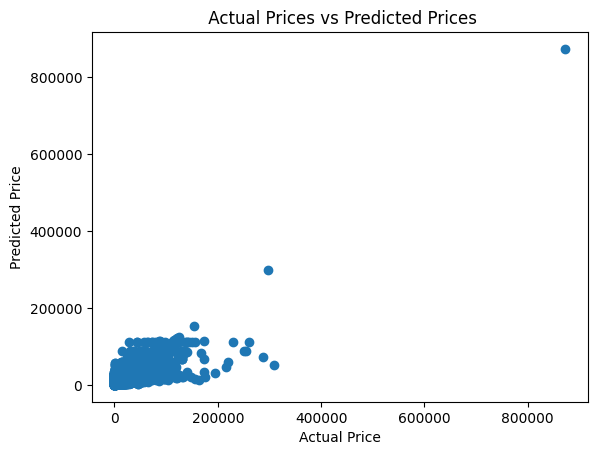

In [ ]:
plt.scatter(y_train, training_data_predict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [ ]:
testpredict=decision.predict(x_test)

In [ ]:
error=metrics.r2_score(y_test,testpredict)
print("error is :",error)

error is : -0.00031171098410731624


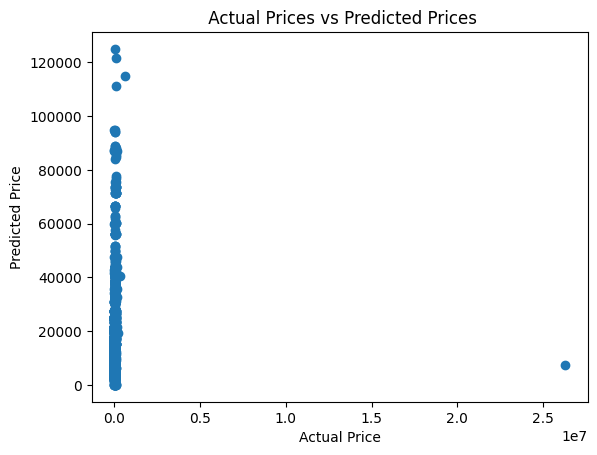

In [ ]:
plt.scatter(y_test, testpredict)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()